                                FORECAST MODELS

1. Analysing time series
2. MeanABS, MSE, and RMSE
3. Testing for Seasonality


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df

                            1. Analysing time series
                            
    - The Granger Causality test tells us if 1 time series can help us 
      forecast the results in another.
    


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4824  , p=0.4921  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=0.5249  , p=0.4687  , df=1
likelihood ratio test: chi2=0.5212  , p=0.4703  , df=1
parameter F test:         F=0.4824  , p=0.4921  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5387  , p=0.0953  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=5.8964  , p=0.0524  , df=2
likelihood ratio test: chi2=5.4605  , p=0.0652  , df=2
parameter F test:         F=2.5387  , p=0.0953  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1821  , p=0.0392  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=11.9329 , p=0.0076  , df=3
likelihood ratio test: chi2=10.2680 , p=0.0164  , df=3
parameter F test:         F=3.1821  , p=0.0392  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9832  , p=0.0043  , df_d

{1: ({'ssr_ftest': (0.4823702925928801, 0.4920696533817285, 34.0, 1),
   'ssr_chi2test': (0.5249323772334283, 0.4687452204257734, 1),
   'lrtest': (0.5212435236474846, 0.4703117117448017, 1),
   'params_ftest': (0.4823702925842138, 0.4920696533855903, 34.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.538742161147265, 0.095267426060596, 31.0, 2),
   'ssr_chi2test': (5.896433406535583, 0.05243312644849365, 2),
   'lrtest': (5.460543478315401, 0.06520156944103611, 2),
   'params_ftest': (2.5387421611466725, 0.09526742606064466, 31.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.1820986334538524, 0.03921153941085654, 28.0, 3),
   'ssr_chi2test': (11.932869875451946, 0.00761669359057782, 3),
   'lrtest': (10.267957654669715, 0.016420488807945922, 3),
   'params_ftest': (3.1820986334537005, 0.039211539410862556, 28.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

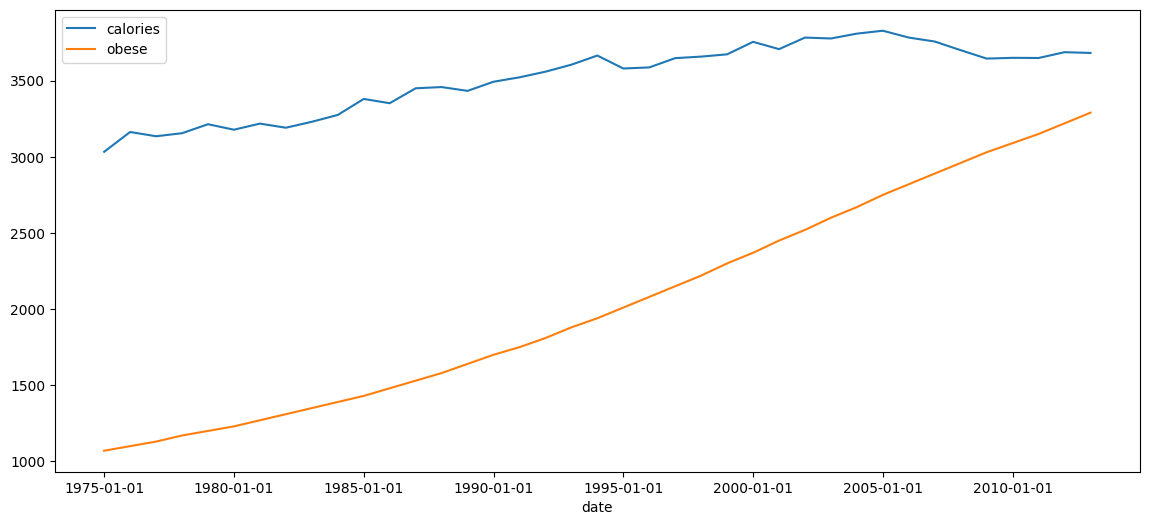

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

def plot_health_data(ax, csv, country, col, mult):
    cal_df = pd.read_csv(csv)
    indexer = cal_df[cal_df['location']==country].index
    country_df = cal_df.loc[indexer, 'date':col]
    country_df = country_df.dropna()
    country_df.set_index('date', inplace=True)
    country_df.drop(columns=country_df.columns.difference([col]), 
                    inplace=True)
    country_df[col] = country_df[col] * mult
    ax = country_df.plot(ax=ax)
    
fig, ax = plt.subplots(figsize=(14,6))
plot_health_data(ax, 'US-Daily-Calories.csv', 'United States',
                'calories', 1)
plot_health_data(ax, 'US-Obese.csv', 'United States',
                'obese', 100)


cal_df = pd.read_csv('US-Daily-Calories.csv')
ob_df = pd.read_csv('US-Obese.csv')
new_df = pd.concat([cal_df, ob_df.obese], axis=1)


ob_diff = np.diff(new_df['obese'], n=1, axis=-1)
cal_diff = np.diff(new_df['calories'], n=1, axis=-1)
new_df = pd.concat([cal_df, pd.Series(ob_diff).rename('ObeseDiff')], 
                    axis=1)
new_df = pd.concat([new_df, pd.Series(cal_diff).rename('CalDiff')],
                    axis=1)
new_df = new_df.dropna()
new_df
grangercausalitytests(new_df[['ObeseDiff', 'CalDiff']], maxlag=4)

# ''' 
# Granger Causality
# number of lags (no zero) 1
# ssr based F test:         F=0.4824  , p=0.4921  , df_denom=34, df_num=1
# ssr based chi2 test:   chi2=0.5249  , p=0.4687  , df=1
# likelihood ratio test: chi2=0.5212  , p=0.4703  , df=1
# parameter F test:         F=0.4824  , p=0.4921  , df_denom=34, df_num=1

# Granger Causality
# number of lags (no zero) 2
# ssr based F test:         F=2.5387  , p=0.0953  , df_denom=31, df_num=2
# ssr based chi2 test:   chi2=5.8964  , p=0.0524  , df=2
# likelihood ratio test: chi2=5.4605  , p=0.0652  , df=2
# parameter F test:         F=2.5387  , p=0.0953  , df_denom=31, df_num=2

# Granger Causality
# number of lags (no zero) 3
# ssr based F test:         F=3.1821  , p=0.0392  , df_denom=28, df_num=3
# ssr based chi2 test:   chi2=11.9329 , p=0.0076  , df=3
# likelihood ratio test: chi2=10.2680 , p=0.0164  , df=3
# parameter F test:         F=3.1821  , p=0.0392  , df_denom=28, df_num=3

# Granger Causality
# number of lags (no zero) 4
# ssr based F test:         F=4.9832  , p=0.0043  , df_denom=25, df_num=4
# ssr based chi2 test:   chi2=27.1085 , p=0.0000  , df=4
# likelihood ratio test: chi2=19.9339 , p=0.0005  , df=4
# parameter F test:         F=4.9832  , p=0.0043  , df_denom=25, df_num=4
# '''

MeanABS, MSE & RMSE:

Mean Absolute Error : Difference between Prediction and Result and find Average

Mean Squared Error : Takes the difference to Find Mean, but Errors Show Dramatically

Root Mean Squared Error : Finding the Square Root Returns to the Original Unit


1.0686607124271006

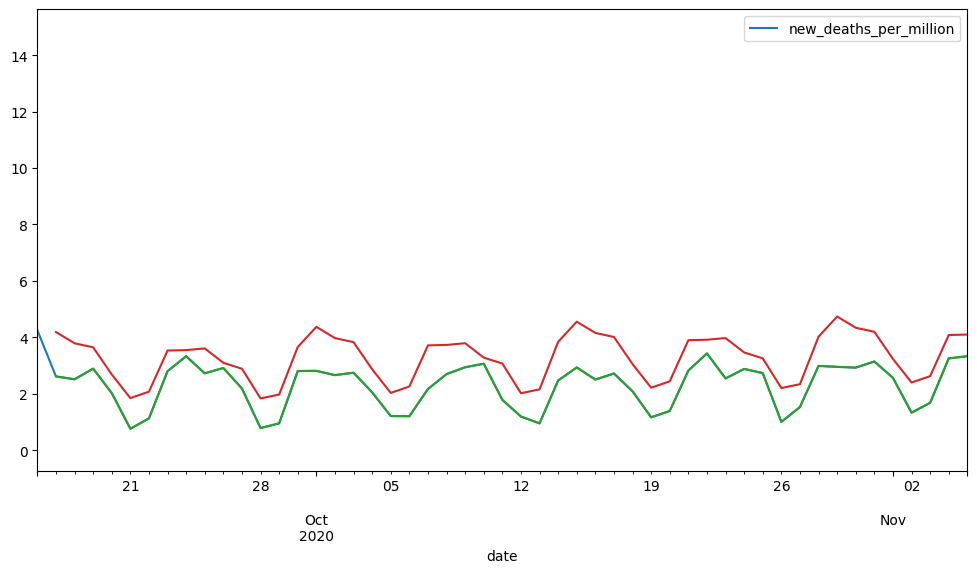

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tools.eval_measures import meanabs, mse, rmse

owid_df = pd.read_csv('owid-covid-data-11-5.csv')
owid_df.columns

# Create Numpy array of unique countries
covid_df = owid_df.location.unique()
# Get indexes for United States
indexer = owid_df[owid_df['location']=='United States'].index
# Get dataframe location and column data for country name
covid_df = owid_df.loc[indexer, 'date':'new_deaths_per_million']
covid_df = covid_df.dropna()
# Convert date to datetime
covid_df['date'] = pd.to_datetime(covid_df['date'])
# Set date as index
covid_df.set_index('date', inplace=True)
# Remove all columns except for what I want
covid_df.drop(columns=covid_df.columns.difference(['new_deaths_per_million']), inplace=True)
covid_df.plot(figsize=(12, 6))
# Plot a 30 day moving average
# covid_df.rolling(window=30).mean()['new_deaths_per_million'].plot()


covid_df = covid_df.asfreq('d')
# covid_df.info()
train_df = covid_df.iloc[:200]
test_df = covid_df.iloc[200:]


# There is no exponential growth so I'll use additive
# I picked 14 for period because it provided the best result
fit_model = ExponentialSmoothing(train_df['new_deaths_per_million'],
                                 trend='add', seasonal='add',
                                 seasonal_periods=14).fit()
# We can now make predictions 50 days into the future
prediction = fit_model.forecast(50)

# Plot training, testing and projection data
train_df['new_deaths_per_million'].plot(figsize=(12, 6))
test_df['new_deaths_per_million'].plot()
prediction.plot(xlim=['2020-09-16','2020-11-05'])

rmse(test_df['new_deaths_per_million'], prediction)

                    Testing for Seasonality

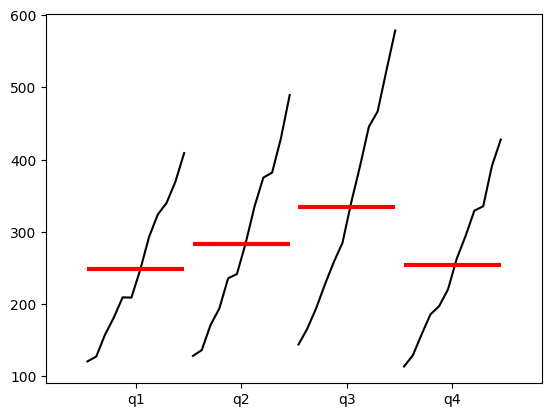

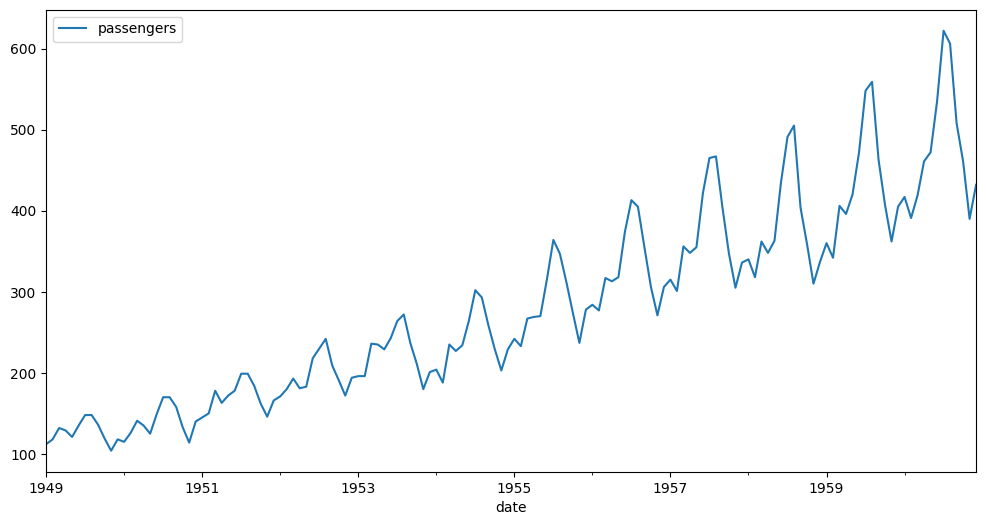

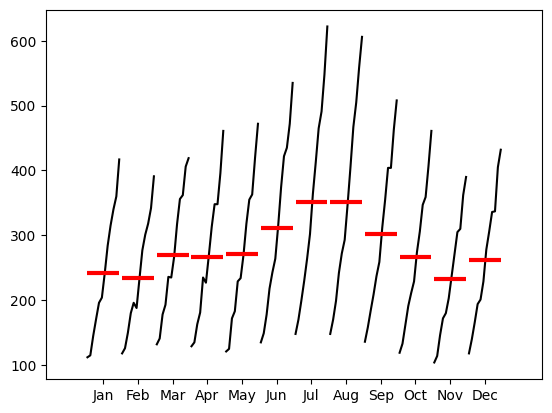

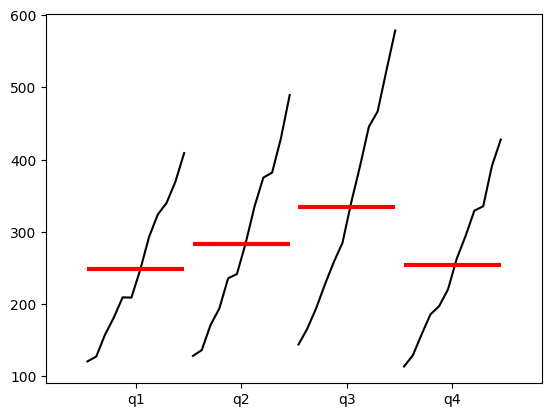

In [79]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot


flight_df = sns.load_dataset('flights')
flight_df['day'] = '01'
# Convert month to datetime
flight_df['month'] = pd.to_datetime(flight_df['month'], format='%b').dt.month
flight_df['date'] = pd.to_datetime(flight_df[['year', 'month', 'day']])
# flight_df['date'] = pd.to_datetime(flight_df['date'])
flight_df.set_index('date', inplace=True)
flight_df.drop(columns=['year', 'month', 'day'], inplace=True)


# Convert index to DatetimeIndex object
# flight_df.index = pd.to_datetime(flight_df.index)

# Set frequency to 'MS'
flight_df = flight_df.asfreq('MS')
flight_df.index
flight_df.plot(figsize=(12, 6))


month_plot(flight_df['passengers'])

f_qtr_df = flight_df['passengers'].resample(rule='Q').mean()
quarter_plot(f_qtr_df)

In [80]:
from statsmodels.tsa.stattools import grangercausalitytests

# Receives ax for plotting, csv file, country, column of interest
def plot_covid_data(ax, csv, country, col):
    cal_df = pd.read_csv(csv)
    indexer = cal_df[cal_df['location']==country].index
    country_df = cal_df.loc[indexer, 'date':col]
    country_df.dropna(inplace=True)

    country_df.set_index('date', inplace=True)
    country_df.drop(columns=country_df.columns.difference([col]), inplace=True)

    ax = country_df.plot(ax=ax, figsize=(12, 6))

# Does lowering lockdown strategy cause the number of new cases to rise?